# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [164]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
import panel as pn
from panel.interact import interact
from panel import widgets

%matplotlib inline

In [165]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(mapbox_token)

## Load Data

In [166]:
# Read the census data into a Pandas DataFrame
file_path = Path("sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239
...,...,...,...,...
2016,Telegraph Hill,903.049771,384242,4390
2016,Twin Peaks,970.085470,384242,4390
2016,Van Ness/ Civic Center,552.602567,384242,4390


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [167]:
# Calculate the mean number of housing units per year (hint: use groupby) 
sfo_data['housing_units'].groupby('year').mean()

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

In [168]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
sfo_data['housing_units'].groupby('year').mean().min()

372560

In [169]:
sfo_data['housing_units'].groupby('year').mean().max()

384242

(370000, 390000)

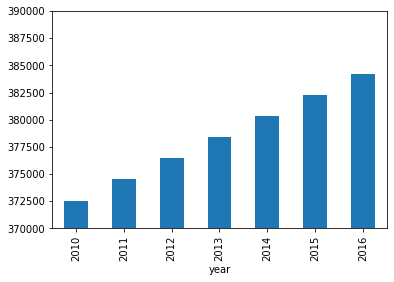

In [170]:
sfo_data['housing_units'].groupby('year').mean().plot(kind='bar').set_ylim(370000, 390000)

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [171]:
# Calculate the average gross rent and average sale price per square foot
sfo_data['gross_rent'].groupby('year').mean()

year
2010    1239
2011    1530
2012    2324
2013    2971
2014    3528
2015    3739
2016    4390
Name: gross_rent, dtype: int64

In [172]:
sfo_data['sale_price_sqr_foot'].groupby('year').mean()

year
2010    369.344353
2011    341.903429
2012    399.389968
2013    483.600304
2014    556.277273
2015    632.540352
2016    697.643709
Name: sale_price_sqr_foot, dtype: float64

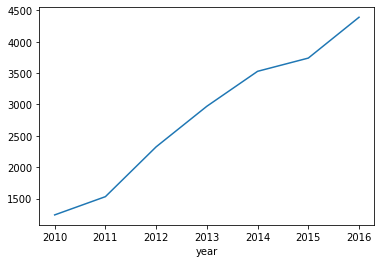

In [173]:
# Plot the Average Gross Rent per Year as a Line Chart 
sfo_data['gross_rent'].groupby('year').mean().plot()

### Average Sales Price per Year

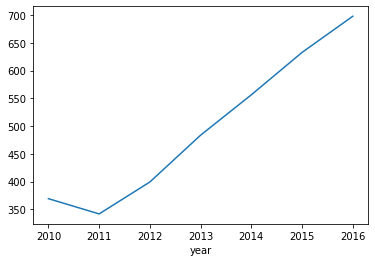

In [174]:
# Plot the Average Sales Price per Year as a line chart
sfo_data['sale_price_sqr_foot'].groupby('year').mean().plot()

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [175]:
# We create a new dataframe of averages grouped by year and neighboorhoo
avg_df = sfo_data.groupby(['year', 'neighborhood']).mean()
avg_df.reset_index(inplace = True)
avg_df

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
...,...,...,...,...,...
392,2016,Telegraph Hill,903.049771,384242,4390
393,2016,Twin Peaks,970.085470,384242,4390
394,2016,Van Ness/ Civic Center,552.602567,384242,4390
395,2016,Visitacion Valley,328.319007,384242,4390


In [176]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
def avg_sales_plot(avg_df):
    return avg_df.hvplot.line(
        x="year",
        y="sale_price_sqr_foot",
        title="Average Sales Prices Per Year By Neighboorhood",
        groupby= "neighborhood")

In [177]:
avg_sales_plot(avg_df)

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [178]:
# Getting the data from the top 10 expensive neighborhoods
neighborhood_df = sfo_data.groupby('neighborhood').mean()
hood_prices = neighborhood_df.sort_values(['sale_price_sqr_foot'], ascending=False)
hood_prices

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000
...,...,...,...
Visitacion Valley,301.466180,381321.50,3657.000000
Outer Mission,242.370952,379374.50,2995.750000
Bayview,204.588623,376454.00,2318.400000


In [179]:
# Plotting the data from the top 10 expensive neighborhoods
most_expensive_10['sale_price_sqr_foot'].head(10).hvplot.bar()

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

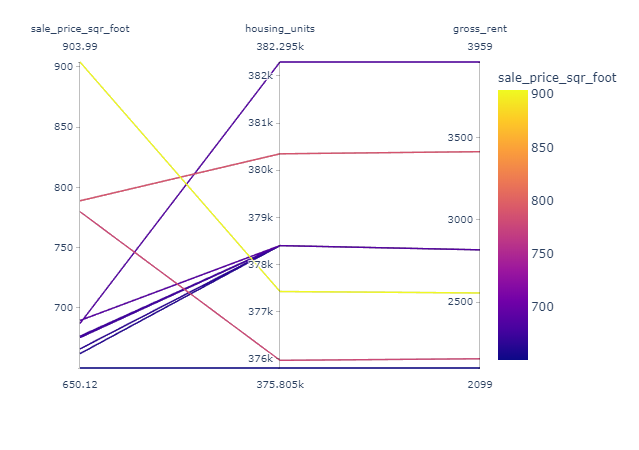

In [180]:
# Parallel Coordinates Plot
px.parallel_coordinates(hood_prices.head(10), color='sale_price_sqr_foot')

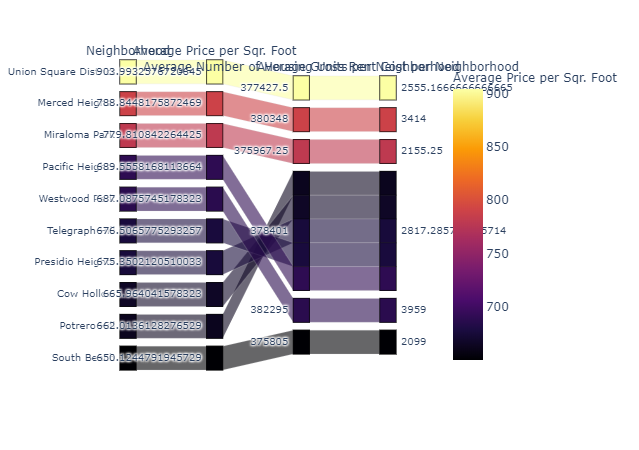

In [181]:
# Parallel Categories Plot
hood_prices.reset_index(inplace=True)
px.parallel_categories(
    hood_prices.head(10),
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "neighborhood": "Neighborhood",
        "sale_price_sqr_foot": "Average Price per Sqr. Foot",
        "housing_units": "Average Number of Housing Units per Neighborhood",
        "gross_rent": "Average Gross Rent Cost per Neighborhood"
    },
)

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [182]:
# Load neighborhoods coordinates data
file_path = Path("neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [183]:
# Calculate the mean values for each neighborhood
## I have already done this above (See "Top 10 Most expensive...")
neighborhood_df

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Alamo Square,366.020712,378401.00,2817.285714
Anza Vista,373.382198,379050.00,3031.833333
Bayview,204.588623,376454.00,2318.400000
Bayview Heights,590.792839,382295.00,3739.000000
Bernal Heights,576.746488,379374.50,3080.333333
...,...,...,...
West Portal,498.488485,376940.75,2515.500000
Western Addition,307.562201,377427.50,2555.166667
Westwood Highlands,533.703935,376454.00,2250.500000


In [184]:
neighborhood_df.reset_index(inplace=True)

In [185]:
# Join the average values with the neighborhood locations
avgs_by_hood_loc = pd.concat([df_neighborhood_locations, neighborhood_df], axis='columns', join='outer')
avgs_by_hood_loc.drop(columns=['neighborhood'], inplace=True)
avgs_by_hood_loc

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.00,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.00,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.00,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.00,3739.000000
4,Bernal Heights,37.728630,-122.443050,576.746488,379374.50,3080.333333
...,...,...,...,...,...,...
68,West Portal,37.740260,-122.463880,498.488485,376940.75,2515.500000
69,Western Addition,37.792980,-122.435790,307.562201,377427.50,2555.166667
70,Westwood Highlands,37.734700,-122.456854,533.703935,376454.00,2250.500000
71,Westwood Park,37.734150,-122.457000,687.087575,382295.00,3959.000000


### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

In [196]:
# Create a scatter mapbox to analyze neighborhood info
map = px.scatter_mapbox(avgs_by_hood_loc,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    zoom=10,)

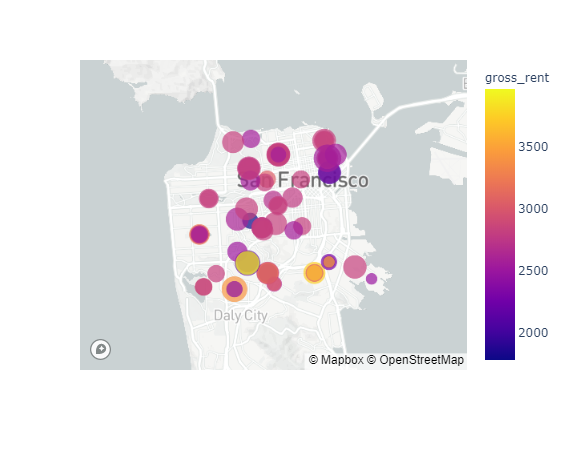

In [197]:
map.show()